In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("/Users/cy/Desktop/IS-477-Project/data/clean/chicago_pm25_weather_daily_clean.csv")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

df.head()


,date,pm25_mean,pm25_min,pm25_max,n_measurements,temp_max,temp_min,precip_sum,shortwave_rad_sum,humidity_mean,wind_speed_max,wind_dir_dominant
0,2023-01-03,6.700,6.5,6.9,2.0,12.7,4.2,13.1,2.13,98,23.6,112
1,2023-01-06,9.625,8.2,11.2,4.0,0.9,-3.7,0.0,5.71,79,18.5,264
2,2023-01-09,20.250,20.0,20.5,2.0,5.7,-4.9,0.0,8.79,80,20.2,215
3,2023-01-12,11.225,10.7,11.6,4.0,6.4,1.4,0.3,2.64,87,37.9,351
4,2023-01-15,7.850,7.8,7.9,2.0,5.1,-3.7,0.0,7.99,69,30.5,166


In [2]:
df.describe()


,date,pm25_mean,pm25_min,pm25_max,n_measurements,temp_max,temp_min,precip_sum,shortwave_rad_sum,humidity_mean,wind_speed_max,wind_dir_dominant
count,128,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2023-06-30 22:52:30,10.189974,9.298438,11.110156,2.804688,15.311719,6.888281,3.592969,15.354609,74.859375,24.842969,165.976562
min,2023-01-03 00:00:00,1.900000,1.500000,2.400000,1.000000,-8.200000,-16.700000,0.000000,1.680000,44.000000,11.400000,5.000000
25%,2023-04-02 06:00:00,5.987500,5.700000,6.700000,2.000000,6.800000,0.075000,0.000000,9.147500,67.000000,19.575000,78.250000
50%,2023-06-27 12:00:00,9.425000,8.450000,10.150000,2.000000,15.450000,6.550000,0.100000,14.310000,76.000000,23.550000,183.500000
75%,2023-09-30 18:00:00,12.337500,11.300000,13.950000,4.000000,23.350000,14.750000,3.000000,22.690000,82.000000,29.000000,241.250000
max,2023-12-29 00:00:00,49.266667,45.700000,54.300000,4.000000,34.600000,22.900000,137.800000,30.720000,98.000000,45.700000,351.000000
std,NaN,5.992050,5.751206,6.393142,1.101599,9.334397,8.818990,13.273377,7.937658,10.561954,7.471496,98.945978


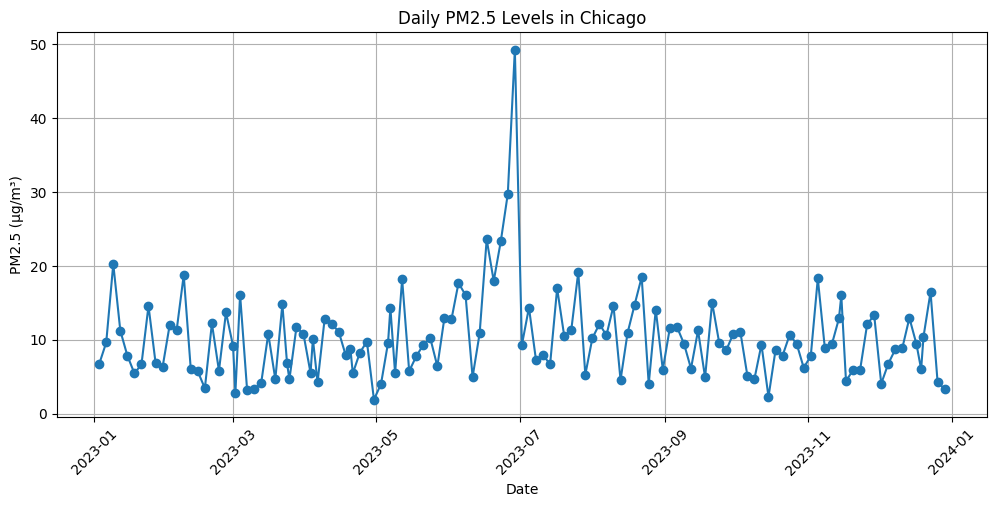

In [3]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["pm25_mean"], marker='o')
plt.title("Daily PM2.5 Levels in Chicago")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


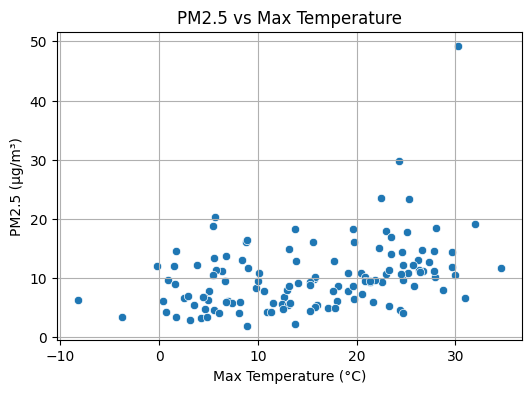

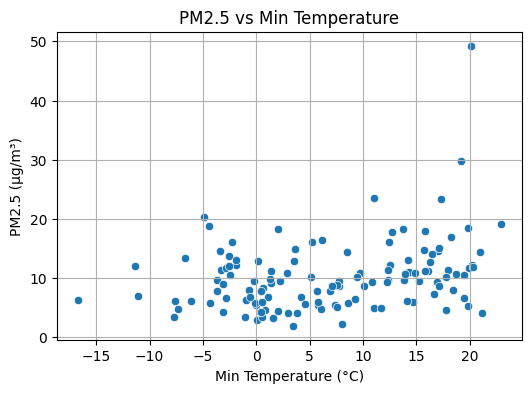

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# PM2.5 vs temp_max
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="temp_max", y="pm25_mean")
plt.title("PM2.5 vs Max Temperature")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()

# PM2.5 vs temp_min
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="temp_min", y="pm25_mean")
plt.title("PM2.5 vs Min Temperature")
plt.xlabel("Min Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()



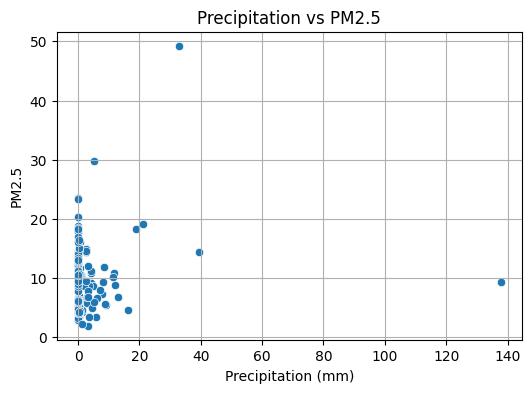

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="precip_sum", y="pm25_mean")
plt.title("Precipitation vs PM2.5")
plt.xlabel("Precipitation (mm)")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()


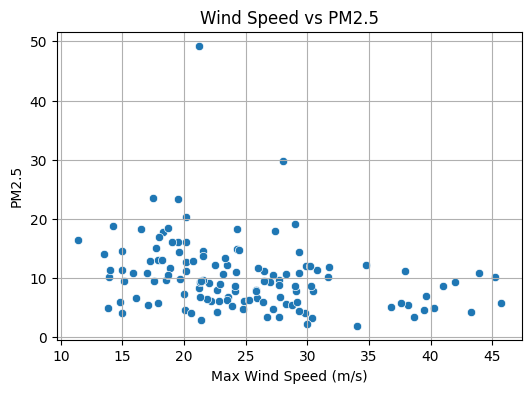

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="wind_speed_max", y="pm25_mean")
plt.title("Wind Speed vs PM2.5")
plt.xlabel("Max Wind Speed (m/s)")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()


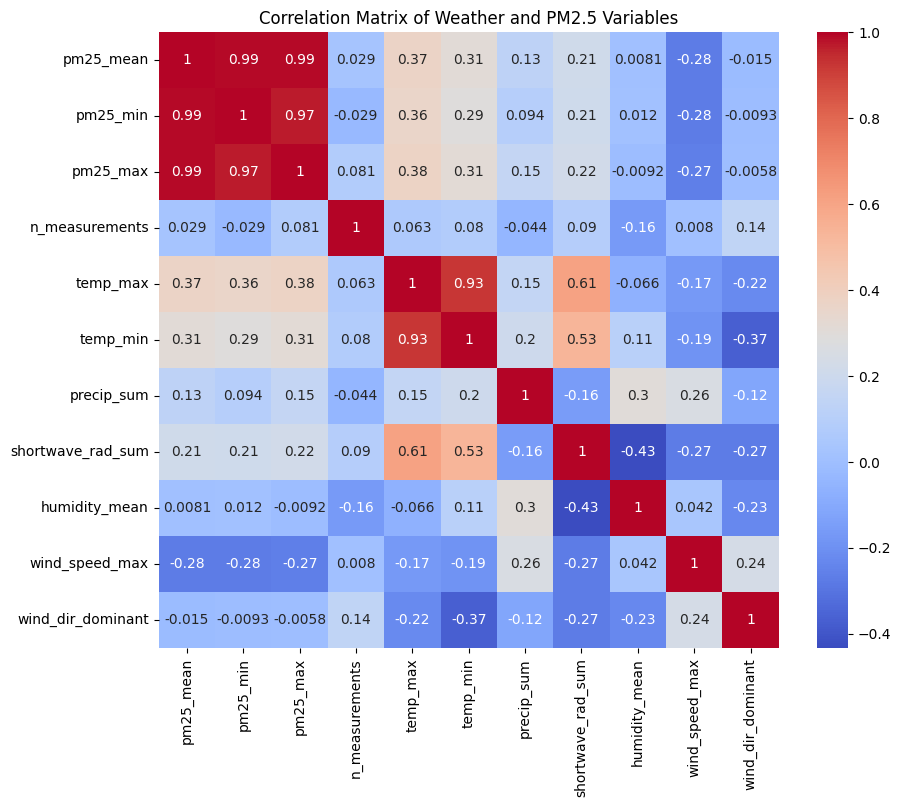

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Weather and PM2.5 Variables")
plt.show()


In [8]:
import statsmodels.api as sm

X = df[["temp_max"]]   # change to temp_mean if available
y = df["pm25_mean"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              pm25_mean   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     20.28
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           1.50e-05
Time:                        16:23:05   Log-Likelihood:                -400.74
No. Observations:                 128   AIC:                             805.5
Df Residuals:                     126   BIC:                             811.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5299      0.951      6.868      0.0